
# **Initiate and Configure Spark**

---


In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark


In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
group_25_session = SparkSession.builder.master("local[*]").appName('Group 25').getOrCreate()


# **Load Data**

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
########## ONLY in Colab ##########

In [ ]:
group25_idsdf = group_25_session.read.option("header", "true").csv("/content/drive/MyDrive/IDS2018/*.csv", inferSchema=True).toDF('Dst Port',
 'Protocol',
 'Timestamp',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max',
 'Idle Min',
 'Attack')

In [ ]:
group25_idsdf.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-------------

In [ ]:
# The total number of attacks per label
group25_idsdf.select('Attack').groupBy('Attack').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|              Attack|  count|
+--------------------+-------+
|              Benign|5329907|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193360|
|      SSH-Bruteforce| 187589|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
+--------------------+-------+



# **SQL Query**

In [ ]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession

from pyspark.sql import Window
from pyspark.sql import functions as f
from pyspark.sql.functions import rank

import matplotlib.pyplot as plt
import seaborn as sns

group25_idsdf.createOrReplaceTempView('main_view')
sqldf = group_25_session.sql('SELECT * FROM main_view')

In [ ]:
sqldf.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-------------

In [ ]:
'''
The objective of the query is to obtain total count of each attack with respect to the status of "Fwd PSH Flags" and "Fwd URG Flags".
The status of the flags are concatenated and are arranged according to the combinations and the outcome was ranked using "Rank" function,
'''

In [ ]:
sqlDF1 = group_25_session.sql('''SELECT Attack, `Fwd PSH Flags`,`Fwd URG Flags`,  count(*) AS Count,
                      RANK() OVER
                                 (
                                    PARTITION BY concat(`Fwd PSH Flags`,`Fwd URG Flags`)
                                    ORDER BY COUNT(Attack) DESC
                                 )
                                  AS Rank
                      FROM main_view
                      GROUP BY Attack, `Fwd PSH Flags`,`Fwd URG Flags`
                      ORDER BY `Fwd PSH Flags`,Rank'''
                  )

sqlDF1.show(30, truncate = False)

+------------------------+-------------+-------------+-------+----+
|Attack                  |Fwd PSH Flags|Fwd URG Flags|Count  |Rank|
+------------------------+-------------+-------------+-------+----+
|Benign                  |0            |0            |5138451|1   |
|DDOS attack-HOIC        |0            |0            |686012 |2   |
|DoS attacks-Hulk        |0            |0            |461912 |3   |
|Bot                     |0            |0            |286188 |4   |
|FTP-BruteForce          |0            |0            |193360 |5   |
|SSH-Bruteforce          |0            |0            |187589 |6   |
|DoS attacks-SlowHTTPTest|0            |0            |139890 |7   |
|DoS attacks-GoldenEye   |0            |0            |41507  |8   |
|DoS attacks-Slowloris   |0            |0            |7421   |9   |
|DDOS attack-LOIC-UDP    |0            |0            |1730   |10  |
|Brute Force -Web        |0            |0            |610    |11  |
|Brute Force -XSS        |0            |0       

In [ ]:
pandasdf1 = sqlDF1.toPandas()

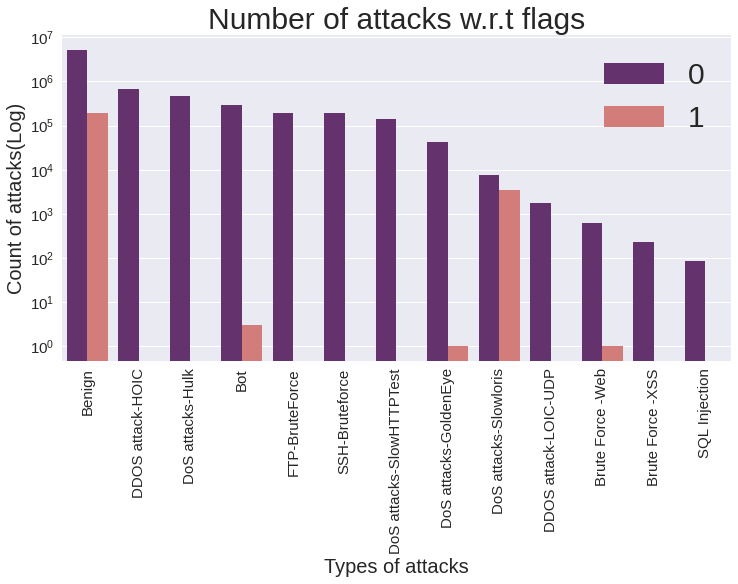

In [ ]:
plt.figure(figsize=(12,6))

plt.style.use('seaborn')

sns.barplot(x = pandasdf1['Attack'], y = pandasdf1['Count'], hue = (pandasdf1["Fwd PSH Flags"] + pandasdf1["Fwd URG Flags"]),
            log=True, palette = "magma", saturation=.6,errcolor='0.3',errwidth= 3,capsize=0.1)

plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)

plt.xlabel('Types of attacks',  fontsize=20)
plt.ylabel('Count of attacks(Log)',  fontsize=20)
plt.title('Number of attacks w.r.t flags', fontsize=30)
plt.legend(loc = "upper right", prop={'size': 30})

In [ ]:
'''
The objective of the query is to calculate the average of "Fwd Pkts/s" and "Bwd Pkts/s" attack wise.
Here the condition is applied using sub-queries where the packets and attacks are chosen when "FIN Flag Cnt"= 0 and is orderd by the count
'''

In [ ]:
sqldf2 = group_25_session.sql('''SELECT Attack,
                             count(*) as Count,
                             AVG(`Fwd Pkts/s`) AS Fwd_Pkts_s,
                             AVG(`Bwd Pkts/s`) AS Bwd_Pkts_s
                             FROM main_view
                             WHERE `FIN Flag Cnt` IN
                                    (
                                    SELECT `FIN Flag Cnt`
                                    FROM main_view
                                    WHERE `FIN Flag Cnt`= 0
                                    )
                            GROUP BY Attack
                            ORDER BY Count
                            DESC'''
                  )

sqldf2.show()

+--------------------+-------+------------------+------------------+
|              Attack|  Count|        Fwd_Pkts_s|        Bwd_Pkts_s|
+--------------------+-------+------------------+------------------+
|              Benign|5305163|22464.436496398623|2775.4606805646686|
|    DDOS attack-HOIC| 686012| 748.9725734699908| 199.4001795989726|
|    DoS attacks-Hulk| 460645|1207.2075868435657| 4.750867503184467|
|                 Bot| 286191|2056.7667358635463|179.76676598617934|
|      FTP-BruteForce| 193360| 594561.8051710402| 594561.8051710402|
|      SSH-Bruteforce| 187589| 79297.78269484936| 79223.34993663382|
|DoS attacks-SlowH...| 139890|367350.04723798257|367350.04723798257|
|DoS attacks-Golde...|  41507| 5.130433543290391|  3.49936803016051|
|DoS attacks-Slowl...|  10865| 31579.88179711358|31611.028472254267|
|DDOS attack-LOIC-UDP|   1730|1078.1448437390195|               0.0|
|    Brute Force -Web|    611|13928.607559041719| 5.588849658101637|
|    Brute Force -XSS|    230| 806

In [ ]:
pandasdf2 = sqldf2.toPandas()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[Text(0, 0, 'Benign'),
 Text(0, 0, 'DDOS attack-HOIC'),
 Text(0, 0, 'DoS attacks-Hulk'),
 Text(0, 0, 'Bot'),
 Text(0, 0, 'FTP-BruteForce'),
 Text(0, 0, 'SSH-Bruteforce'),
 Text(0, 0, 'DoS attacks-SlowHTTPTest'),
 Text(0, 0, 'DoS attacks-GoldenEye'),
 Text(0, 0, 'DoS attacks-Slowloris'),
 Text(0, 0, 'DDOS attack-LOIC-UDP'),
 Text(0, 0, 'Brute Force -Web'),
 Text(0, 0, 'Brute Force -XSS'),
 Text(0, 0, 'SQL Injection')]

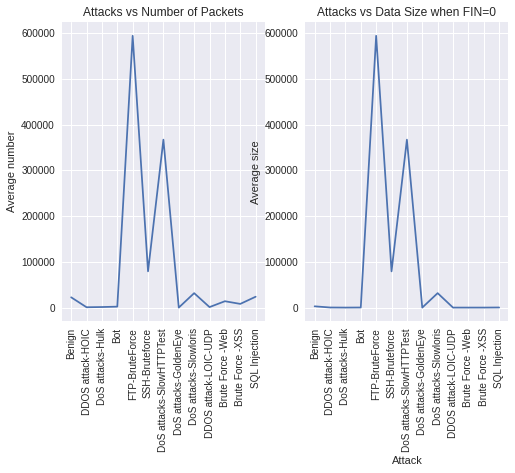

In [ ]:
attacks = pandasdf2['Attack']
pkt_nos = pandasdf2['Fwd_Pkts_s']
data_size = pandasdf2['Bwd_Pkts_s']

fig,(ax1,ax2) = plt.subplots(nrows=1 , ncols=2)

ax1.plot(attacks , pkt_nos)
ax2.plot(attacks , data_size)

ax1.legend()
ax1.set_title('Attacks vs Number of Packets')
ax1.set_ylabel('Average number')
ax1.set_xticklabels(attacks, rotation=90)

ax2.legend()
ax2.set_title('Attacks vs Data Size when FIN=0')
ax2.set_xlabel('Attack')
ax2.set_ylabel('Average size')
ax2.set_xticklabels(attacks, rotation=90)


# **Statistical Analysis**

---


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

In [ ]:
from pyspark.sql.functions import month

IDS_df1 = group25_idsdf.withColumn('Timestamp', month(f.to_timestamp(f.col('Timestamp'), 'dd/MM/yyyy HH:mm:ss')))

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

indexer = StringIndexer(inputCol="Attack", outputCol="attack_index").fit(IDS_df1)
df_ind = indexer.transform(IDS_df1)

assembler = VectorAssembler(inputCols = ['Timestamp'], outputCol = 'vector_features')

df_vector = assembler.transform(df_ind).select('attack_index', 'vector_features')

In [ ]:
# Chi Square Test
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest

r = ChiSquareTest.test(df_vector, 'vector_features', 'attack_index').head()

print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

In [ ]:
df_grp = group25_idsdf.groupBy('Attack').agg(
                                      (f.percentile_approx('Flow Duration',0.8).alias('Top 20%')),
                                      (f.mean('Flow Duration').alias('Mean Flow Duration'))
                                     ).sort('Top 20%', ascending=False)
df_grp.show()

+--------------------+------------+--------------------+
|              Attack|     Top 20%|  Mean Flow Duration|
+--------------------+------------+--------------------+
|DDOS attack-LOIC-UDP|1.19930224E8|1.1601816935086705E8|
|DoS attacks-Slowl...| 1.0783832E8| 7.198033629071884E7|
|    Brute Force -Web| 8.9479488E7| 3.544130448445172E7|
|    Brute Force -XSS| 5.7126876E7|2.8662697852173913E7|
|DoS attacks-Golde...| 1.1963057E7|1.1233440509949889E7|
|              Benign|   5349705.0|1.3173472741472788E7|
|       SQL Injection|   5011734.0|  3315726.9310344825|
|      SSH-Bruteforce|    379247.0|  183349.68250803617|
|    DoS attacks-Hulk|     46060.0|   301755.6113090805|
|    DDOS attack-HOIC|     15955.0|    9720.32487041043|
|                 Bot|     11140.0|   75298.90850166498|
|DoS attacks-SlowH...|         4.0|   4.899885624419187|
|      FTP-BruteForce|         3.0|  3.8031961108812578|
+--------------------+------------+--------------------+



In [ ]:
pandasdfs1 = df_grp.toPandas()

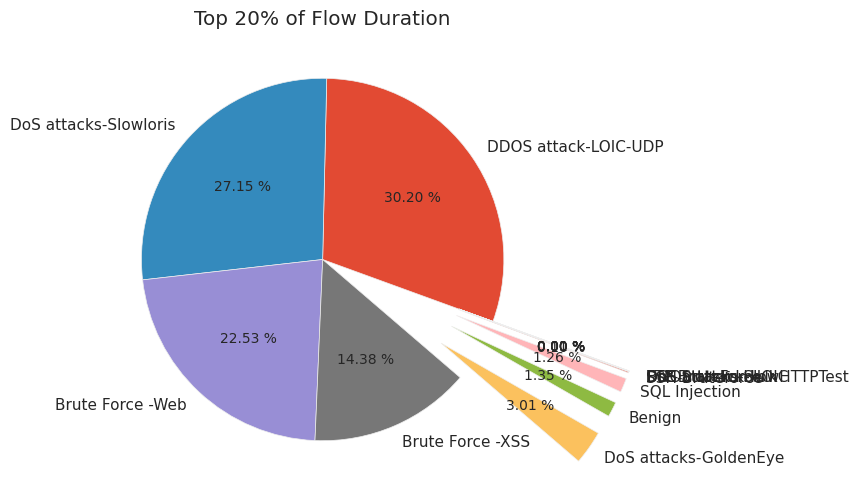

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
plt.style.use('ggplot')

explode = (0, 0, 0,0, 0.8 , 0.8 ,0.8, 0.8 , 0.8 ,0.8 , 0.8 ,0.8,0.8)

plt.pie(pandasdfs1['Top 20%'], labels=pandasdfs1['Attack'],explode=explode,pctdistance=0.6,autopct='%.2f %%',startangle=340)
plt.title('Top 20% of Flow Duration')

plt.show()

In [ ]:
# Spearman's Correlation

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=['Flow Pkts/s','Active Mean','Down/Up Ratio', 'Fwd IAT Mean', 'Bwd IAT Mean','Subflow Fwd Pkts','Subflow Bwd Pkts'], outputCol=vector_col)
df_vector = assembler.transform(group25_idsdf).select(vector_col)
matrix = Correlation.corr(df_vector, vector_col, method='spearman')
result = matrix.collect()[0][0].values

matrix_op = pd.DataFrame(result.reshape(-1, len(['Flow Pkts/s','Active Mean','Down/Up Ratio','Fwd IAT Mean', 'Bwd IAT Mean','Subflow Fwd Pkts','Subflow Bwd Pkts'])), columns=['Flow Pkts/s','Active Mean','Down/Up Ratio','Fwd IAT Mean', 'Bwd IAT Mean','Subflow Fwd Pkts','Subflow Bwd Pkts'], index=['Flow Pkts/s','Active Mean','Down/Up Ratio','Fwd IAT Mean', 'Bwd IAT Mean','Subflow Fwd Pkts','Subflow Bwd Pkts'])

matrix_op.head()


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


,Flow Pkts/s,Active Mean,Down/Up Ratio,Fwd IAT Mean,Bwd IAT Mean,Subflow Fwd Pkts,Subflow Bwd Pkts
Flow Pkts/s,1.000000,-0.377846,0.263630,-0.892311,-0.560151,-0.583254,-0.368167
Active Mean,-0.377846,1.000000,0.061499,0.372615,0.425635,0.387818,0.367523
Down/Up Ratio,0.263630,0.061499,1.000000,-0.475478,-0.003997,-0.403902,0.289266
Fwd IAT Mean,-0.892311,0.372615,-0.475478,1.000000,0.585243,0.730410,0.321086
Bwd IAT Mean,-0.560151,0.425635,-0.003997,0.585243,1.000000,0.831893,0.891291


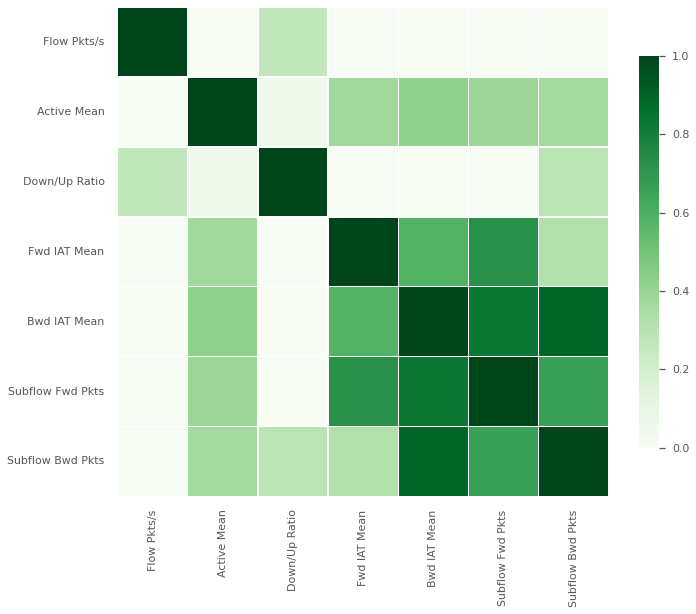

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(matrix_op, cmap="Greens", vmin= 0, vmax=1, linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

In [ ]:
# Kolmogorov Smirnov Test

from pyspark.ml.stat import KolmogorovSmirnovTest

kstResult = KolmogorovSmirnovTest.test(group25_idsdf,'TotLen Fwd Pkts','norm', 0.0, 1.0).first()
round(kstResult.pValue, 2)

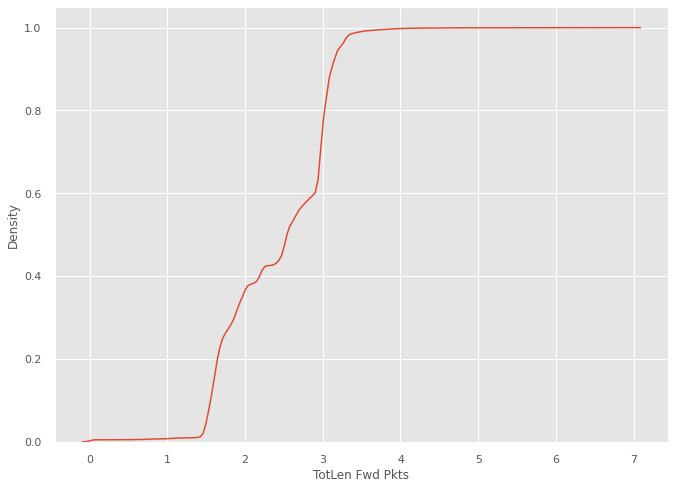

In [ ]:
data = group25_idsdf.withColumn('TotLen Fwd Pkts', f.log10('TotLen Fwd Pkts'))

pandasdf3= data.select('TotLen Fwd Pkts').toPandas()

sns.kdeplot(pandasdf3['TotLen Fwd Pkts'] , cumulative=True )


# **ML Model**

---


In [ ]:
'''
Here we first remove the feature with hugh null values and convert the "timestamp" feature to "month" for easier computation. We then use string-indexer to convert our
target feature to numerical indices and vector-assemebler to assemble all our features into one single column. Then we split the data with 70% for training and 30% testing.
Later we fit our "random forest classifer" on the training data and predict the trained model on the test data. Using a multi-class evlautaor we calculate our model accuracy
for all the 13 labels and print out the accuracy, f1-score, precision and recall for our model.
'''

'\nHere we first remove the feature with hugh null values and convert the "timestamp" feature to "month" for easier computation. We then use string-indexer to convert our \ntarget feature to numerical indices and vector-assemebler to assemble all our features into one single column. Then we split the data with 70% for training and 30% testing.\nLater we fit our "random forest classifer" on the training data and predict the trained model on the test data. Using a multi-class evlautaor we calculate our model accuracy \nfor all the 13 labels and print out the accuracy, f1-score, precision and recall for our model.\n'

In [ ]:
import pyspark.sql.functions as F
from pyspark.sql.functions import month

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler

In [ ]:
kunal_df3 = group25_idsdf.drop('Flow Byts/s')
kunal_df4 = kunal_df3.withColumn('Timestamp', month(F.to_timestamp(F.col('Timestamp'), 'dd/MM/yyyy HH:mm:ss')))
only_features = kunal_df4.drop('Attack')

In [ ]:
stringindexer = StringIndexer(inputCol="Attack", outputCol="attack_index").fit(kunal_df4)
df_indexed = stringindexer.transform(kunal_df4)

vec_assembler = VectorAssembler(inputCols=only_features.columns, outputCol="vector_features")
finaldf = vec_assembler.transform(df_indexed).select('vector_features', 'attack_index','Attack')

(train, test) = finaldf.randomSplit([0.7, 0.3])
rf_classifier = RandomForestClassifier(labelCol="attack_index", featuresCol="vector_features", numTrees=8)

In [ ]:
algorithm = rf_classifier.fit(train)
predictions = algorithm.transform(test)

In [ ]:
back_converter = IndexToString(inputCol="prediction", outputCol="predicted_attack", labels=stringindexer.labels)
final_predictions = back_converter.transform(predictions)

final_predictions.show()

+--------------------+------------+------+--------------------+--------------------+----------+----------------+
|     vector_features|attack_index|Attack|       rawPrediction|         probability|prediction|predicted_attack|
+--------------------+------------+------+--------------------+--------------------+----------+----------------+
|(78,[0,1,2,3,4,5,...|         0.0|Benign|[7.92900766123652...|[0.99112595765456...|       0.0|          Benign|
|(78,[0,1,2,3,4,5,...|         0.0|Benign|[7.93445599247119...|[0.99180699905889...|       0.0|          Benign|
|(78,[0,1,2,3,4,5,...|         0.0|Benign|[7.93445599247119...|[0.99180699905889...|       0.0|          Benign|
|(78,[0,1,2,3,4,5,...|         0.0|Benign|[7.93445599247119...|[0.99180699905889...|       0.0|          Benign|
|(78,[0,1,2,3,4,5,...|         0.0|Benign|[7.93445599247119...|[0.99180699905889...|       0.0|          Benign|
|(78,[0,1,2,3,4,5,...|         0.0|Benign|[7.93445599247119...|[0.99180699905889...|       0.0| 

In [ ]:
multi_class_model = MulticlassClassificationEvaluator(labelCol="attack_index", predictionCol="prediction", metricName="accuracy")

accuracy = multi_class_model.evaluate(final_predictions)

print(f'Accuracy is {round((accuracy*100),2)}% with test error {round((1 - accuracy)*100,2)}%')

Accuracy is 96.68% with test error 3.32%


In [ ]:
y_true_values = final_predictions.select(['attack_index']).collect()
y_pred_values = final_predictions.select(['prediction']).collect()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = classification_report(y_true_values, y_pred_values)
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99   1597272
         1.0       0.95      1.00      0.98    205412
         2.0       1.00      0.94      0.97    138398
         3.0       0.97      0.97      0.97     85395
         4.0       0.58      1.00      0.73     58016
         5.0       1.00      1.00      1.00     56208
         6.0       0.00      0.00      0.00     41937
         7.0       1.00      0.57      0.72     12413
         8.0       1.00      0.65      0.79      3347
         9.0       0.00      0.00      0.00       562
        10.0       0.00      0.00      0.00       183
        11.0       0.00      0.00      0.00        84
        12.0       0.00      0.00      0.00        29

    accuracy                           0.97   2199256
   macro avg       0.58      0.55      0.55   2199256
weighted avg       0.96      0.97      0.96   2199256



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
